# Example use of the Cell class

In [10]:
"""Example use of the Cell class"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from   rcsparameters.geometry.cell import Cell

In [11]:
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # legend fontsize

The class has a set of default paramaters (corresponds to RCS2).
You can provide the class with two files:
- a geometric file: same file parameter that you would give to the geometry class
- a complementary file that contains information necessary to calculate the beam size, QP aperture, RF length necessary...

An example of the complementary file is given in the following, for RCS 2:

In [12]:
default_para_RCS1={
        'n_sigma':6, #Nb of sigma of beam size that the QP aperture must fit
        'sigma_delta':5e-3, #Max dispersion in energy of the beam
        'emitt_n':25e-6, #Normalized emittance
        'n_cav':700, #Total number of cavity
        'l_cav':1.2474, #Length of 1 cavity
        'mu':np.pi/2, #Phase advance per cell
        'apert_min':30e-3, #Min aperture size (diam) to be taken for QP
        'dx':10e-3, #Extra radius length to be taken to fit vacuum chambers
        'Bpole':1, #Max field on QP pole
    }
default_para_RCS2={
        'n_sigma':6, #Nb of sigma of beam size that the QP aperture must fit
        'sigma_delta':5e-3, #Max dispersion in energy of the beam
        'emitt_n':25e-6, #Normalized emittance
        'n_cav':380, #Total number of cavity
        'l_cav':1.2474, #Length of 1 cavity
        'mu':np.pi/2, #Phase advance per cell
        'apert_min':30e-3, #Min aperture size (diam) to be taken for QP
        'dx':10e-3, #Extra radius length to be taken to fit vacuum chambers
        'Bpole':1, #Max field on QP pole
    }
default_para_RCS3={
        'n_sigma':6, #Nb of sigma of beam size that the QP aperture must fit
        'sigma_delta':5e-3, #Max dispersion in energy of the beam
        'emitt_n':25e-6, #Normalized emittance
        'n_cav':540, #Total number of cavity
        'l_cav':1.2474, #Length of 1 cavity
        'mu':np.pi/2, #Phase advance per cell
        'apert_min':30e-3, #Min aperture size (diam) to be taken for QP
        'dx':10e-3, #Extra radius length to be taken to fit vacuum chambers
        'Bpole':1, #Max field on QP pole
    }
default_para_RCS4={
        'n_sigma':6, #Nb of sigma of beam size that the QP aperture must fit
        'sigma_delta':5e-3, #Max dispersion in energy of the beam
        'emitt_n':25e-6, #Normalized emittance
        'n_cav':3000, #Total number of cavity
        'l_cav':1.2474, #Length of 1 cavity
        'mu':np.pi/2, #Phase advance per cell
        'apert_min':30e-3, #Min aperture size (diam) to be taken for QP
        'dx':10e-3, #Extra radius length to be taken to fit vacuum chambers
        'Bpole':1, #Max field on QP pole
    }

In [13]:
default_geo={
   'type': 'hybrid', #Type of the RCS
   'C': 5990, #Circumference
   'E_inj': 313.830e9, #Injection energy
   'E_ext': 750e9, #Exraction energy
   'LSSS': 2.5, #Length insertion for QP/SXT
   'dipole_spacing': 0.3, #Spacing between two dipoles
   'nb_RF_section': 24, #Total nb of RF sections
   'nb_arc': 26, #Total nb of arc
   'nb_cell_arc': 10, #Nb of cells per arc
   'dipoles': { # Dipole field and shape of the ramp
      'BNC': [1.8, 'linear'],
	'BSC': 10.0
   },
   'filling_ratio': 0.85, #Filling ratio of the arc wrt to the circumference
   'filling_ratio_RF': 0.4, #Filling ratio of the RF cavities in the RF section
   'pattern': ['BSC','BNC','BSC'] #Pattern of a half-cell
}
default_geo_RCS1='/mnt/c/muco/code/class_geometry/parameter_files/para_RCS_LE.txt'
default_geo_RCS2='/mnt/c/muco/code/class_geometry/parameter_files/para_RCS_ME.txt'
default_geo_RCS3='/mnt/c/muco/code/class_geometry/parameter_files/para_RCS_HE.txt'
default_geo_RCS4='/mnt/c/muco/code/class_geometry/parameter_files/para_RCS_FE.txt'



In [14]:
cell=Cell(file_input_geo=default_geo_RCS4, file_input_opt=default_para_RCS4)

Load json file /mnt/c/muco/code/class_geometry/parameter_files/para_RCS_FE.txt
Load json file /mnt/c/muco/code/class_geometry/parameter_files/para_RCS_FE.txt


/mnt/c/muco/mhega/rcsparameters/rcsparameters/geometry/geometry.py:297: UserWarning: Number of cells per arc was optimised from 19 to 11
  warnings.warn(f"Number of cells per arc was optimised from {self._nb_cell_arc} to {self.nc_best}", UserWarning)


The class computes the optimum quadrupole and cell length for a RCS. 
The aperture of the QP is adapted to fit the beam size. 
The aperture in the NC and SC dipole is calculated for the optimum solution. 

In [15]:
print('Optimal number of cell', cell.nc_opt)
print('Optimal cell length ', cell.lcell_opt)
print('Optimal quad length', cell.lquad_opt)
print('Filling ratio of arc', cell.rcs_opt.filling_ratio)
print('Momentum compaction factor', cell.mcf)
if cell.type=="hybrid": 
    print('Aperture in NC dipoles', cell.width_nc_opt)
    print('Aperture in SC dipoles', cell.width_sc_opt)

Optimal number of cell 10.0
Optimal cell length  120.22230769230768
Optimal quad length 9.160217539680499
Filling ratio of arc 0.89308
Momentum compaction factor 0.0002499136647757302
Aperture in NC dipoles 0.0671599364261142
Aperture in SC dipoles 0.04037064425751996


We can visualize the optimum by plotting the possible solutions of cell length $L_c$ and quad length $L_{qp}$. 
The possible solutions are the one that 'fits' in the circumference of the given RCS.

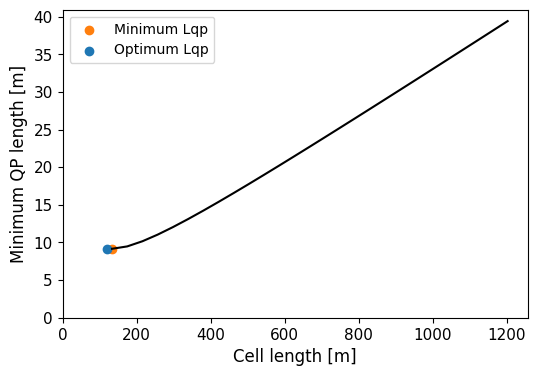

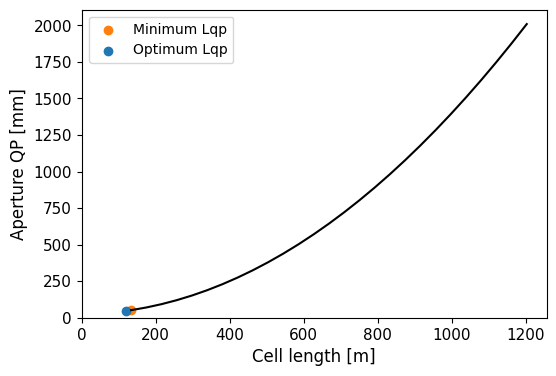

In [16]:
plt.figure(figsize=(6,4))
plt.plot(cell.lcell_sol,cell.lquad_sol,color='k')
plt.scatter(cell.lcell_sol[np.argmin(cell.lquad_sol)], cell.lquad_min, color='tab:orange',
            label='Minimum Lqp')
plt.scatter(cell.lcell_opt, cell.lquad_opt, color='tab:blue', label='Optimum Lqp')
plt.xlabel('Cell length [m]')
plt.ylabel('Minimum QP length [m]')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(cell.lcell_sol, 2*cell.size_beam_sol*1e3,color='k')
plt.scatter(cell.lcell_sol[np.argmin(cell.lquad_sol)],2*1e3*cell.size_beam_sol[
    np.argmin(cell.lquad_sol)], color='tab:orange',label='Minimum Lqp')
plt.scatter(cell.lcell_opt,cell.apert_diam*1e3,color='tab:blue', label='Optimum Lqp' )
plt.xlabel('Cell length [m]')
plt.ylabel('Aperture QP [mm]')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.legend()
plt.show()

The minimum Lqp point corresponds to the cell length that minimizes the quadrupole length. 

Having a discrete number of cells per arc does not allow to have a set of continuous solutions for $L_c$: 
the optimum $L_{qp}$ corresponds to a cell length that gives an integer number of cells.

For all the possible cell lengths, we plot the corresponding number of cells per arc in which it fits. 

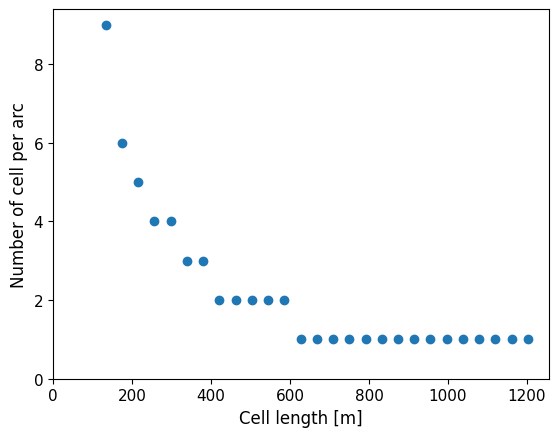

In [17]:
plt.figure()
plt.scatter(cell.lcell_sol,cell.nc_sol)
plt.xlabel('Cell length [m]')
plt.ylabel('Number of cell per arc')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

The aperture in the NC and SC dipoles only depend on the number of cells per arc $n_c$. The beam size is determined by the cell length $L_c$ (and we only have one $L_c$ for each $n_c$: $L_c = L_{arc}/n_c$). The excursion in the dipoles only depends on $n_c$. 

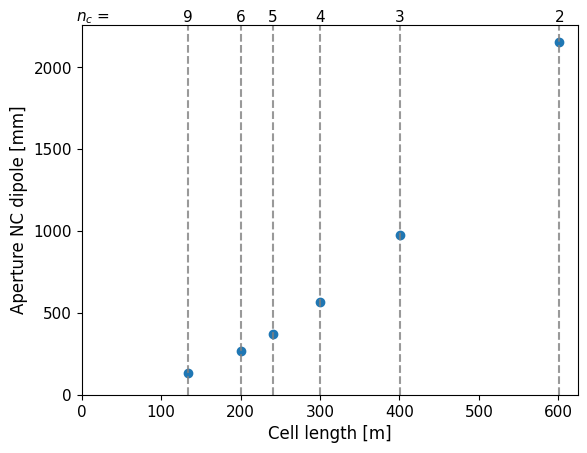

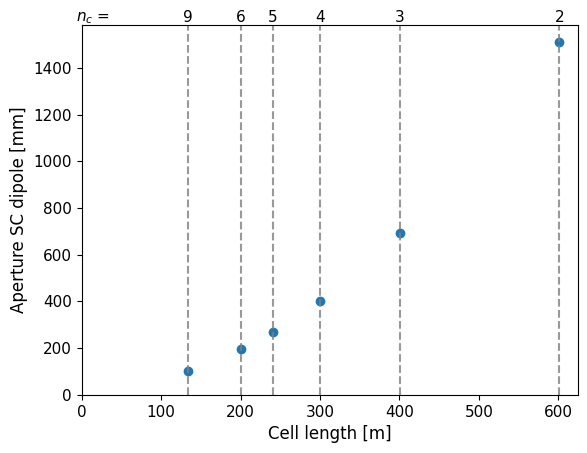

In [18]:
plt.figure()
plt.scatter(pd.unique(cell.lcell_geo)[:-1],pd.unique(cell.apert_nc_geo)[:-1]*1e3)
y_leg=plt.ylim()[1]
for l_cell in pd.unique(cell.lcell_geo)[:-1]:
    plt.axvline(x=l_cell, linestyle='dashed',alpha=0.8, color='grey')
    plt.text(l_cell,y_leg*1.02,f'{int(cell.arc_length/l_cell)}', ha='center', va='center',
                fontsize=11, color='black',fontdict={'fontname':'DejaVu Sans'})
plt.text(15,y_leg*1.02,'$n_c$ = ', ha='center', va='center', fontsize=11, color='black',
            fontdict={'fontname':'DejaVu Sans'})
plt.xlabel('Cell length [m]')
plt.ylabel('Aperture NC dipole [mm]')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

plt.figure()
plt.scatter(pd.unique(cell.lcell_geo)[:-1],pd.unique(cell.apert_sc_geo)[:-1]*1e3)
y_leg=plt.ylim()[1]
for l_cell in pd.unique(cell.lcell_geo)[:-1]:
    plt.axvline(x=l_cell, linestyle='dashed',alpha=0.8, color='grey')
    plt.text(l_cell,y_leg*1.02,f'{int(cell.arc_length/l_cell)}', ha='center', va='center',
                fontsize=11, color='black',fontdict={'fontname':'DejaVu Sans'})
plt.text(15,y_leg*1.02,'$n_c$ = ', ha='center', va='center', fontsize=11, color='black',
            fontdict={'fontname':'DejaVu Sans'})
plt.xlabel('Cell length [m]')
plt.ylabel('Aperture SC dipole [mm]')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

The beam size and the excursion increases with $L_c$. In terms of aperture, the larger $n_c$ the smaller aperture we will need.